In [78]:
# from google.colab import drive
# drive.mount('/content/drive')

In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# **Importing dataset**

In [80]:
waterquality_df= pd.read_csv('../data/water_potability.csv')
waterquality_df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [81]:
waterquality_df.shape

(3276, 10)

In [82]:
waterquality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Seems like out of ten columns, 3 columns have null values:  ph,sulfate and Trihalomethanes
Let's look at amount of null values in those columns

In [83]:
waterquality_df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Lets's see if there are any duplicate values

In [84]:
waterquality_df.duplicated().sum()

0

In [85]:
waterquality_df.dropna(inplace=True)
waterquality_df.shape

(2011, 10)

In [86]:
waterquality_df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

Since the data set is imbalanced

# EDA

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

Now let's see if threre is any correaltion between different features

<Axes: >

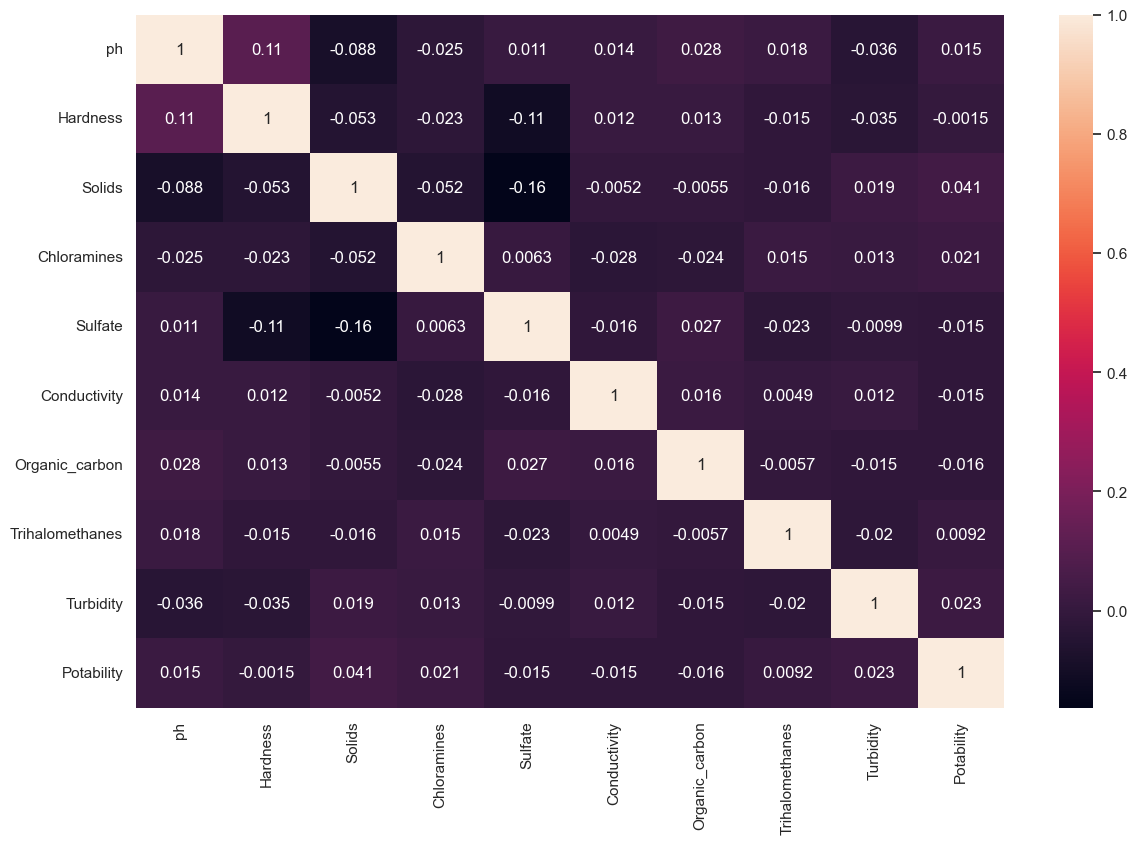

In [88]:
sns.set(rc={'figure.figsize':(14,9)})
corr= waterquality_df.corr()
sns.heatmap(corr,annot=True)


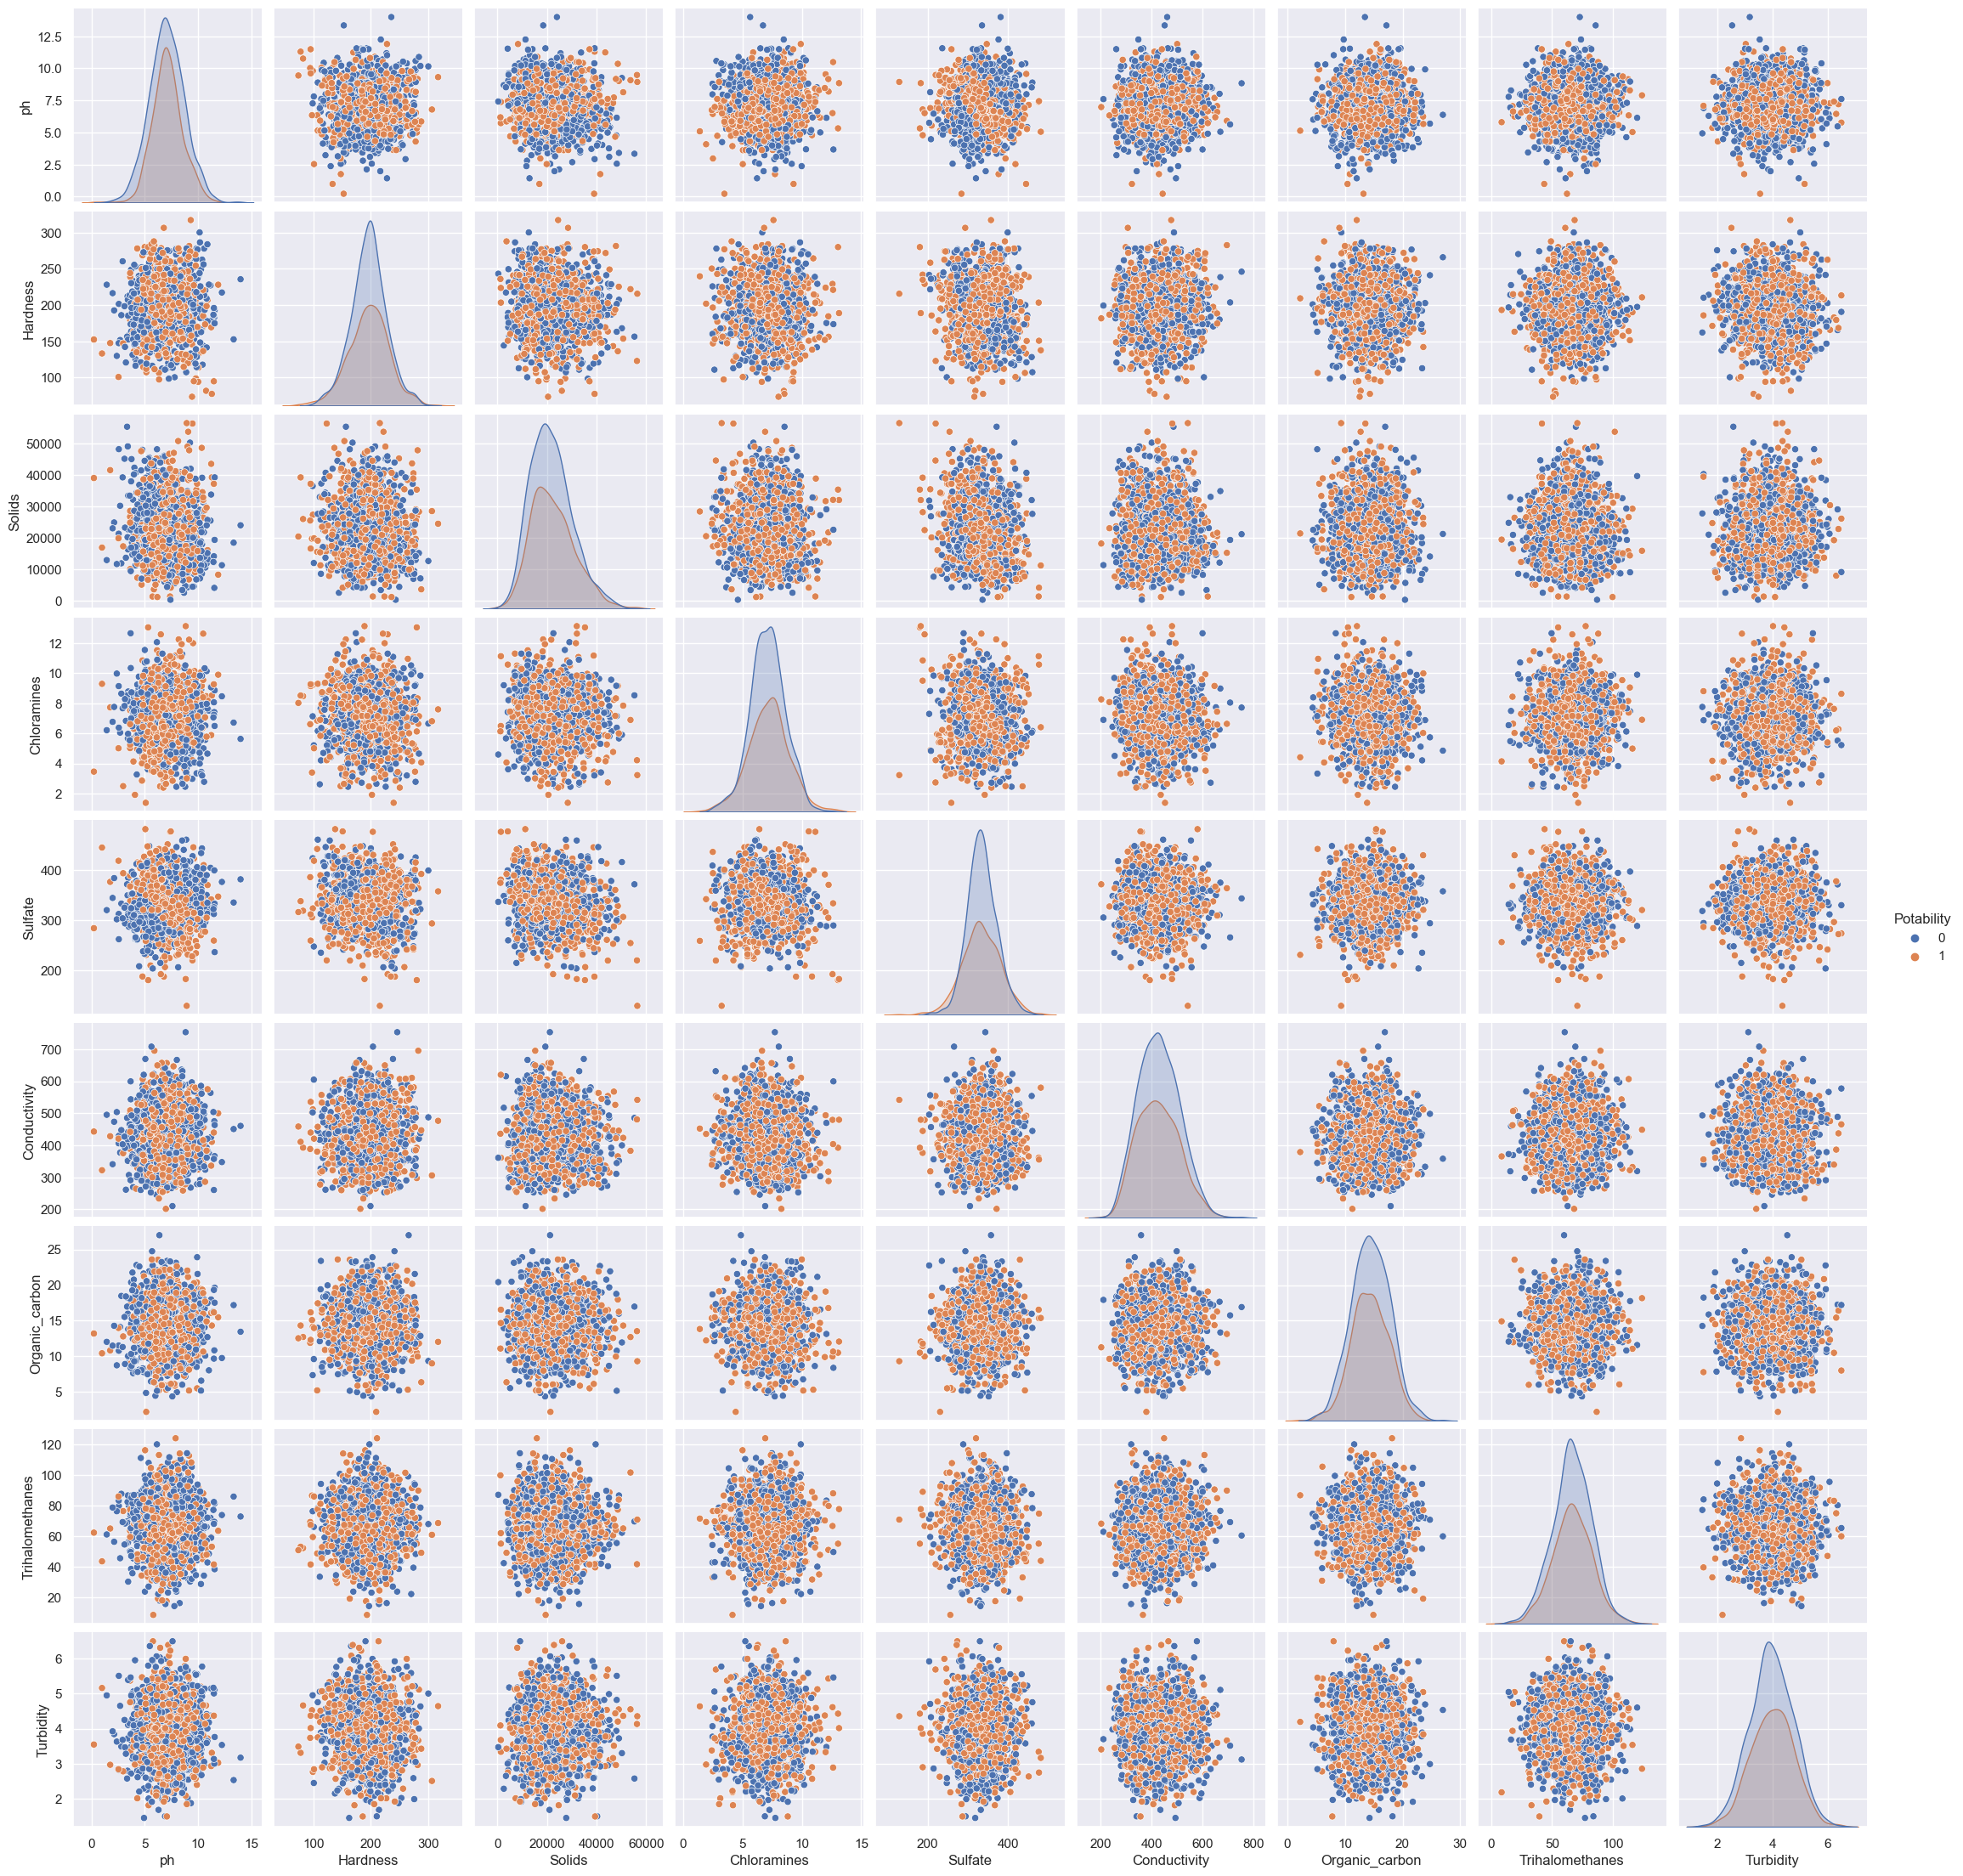

In [67]:
sns.pairplot(waterquality_df, hue= 'Potability')

In [68]:
waterquality_df=waterquality_df.reset_index(drop=True)
waterquality_df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
1   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
2   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
3  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
4   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       18.436524       100.341674   4.628771           0  
1       11.558279        31.997993   4.075075           0  
2        8.399735        54.917862   2.559708           0  
3       13.789695        84.603556   2.672989           0  
4       12.363817        62.798309   4.401425           0

ratio of potable to non potable 0.6758333333333333


<BarContainer object of 2 artists>

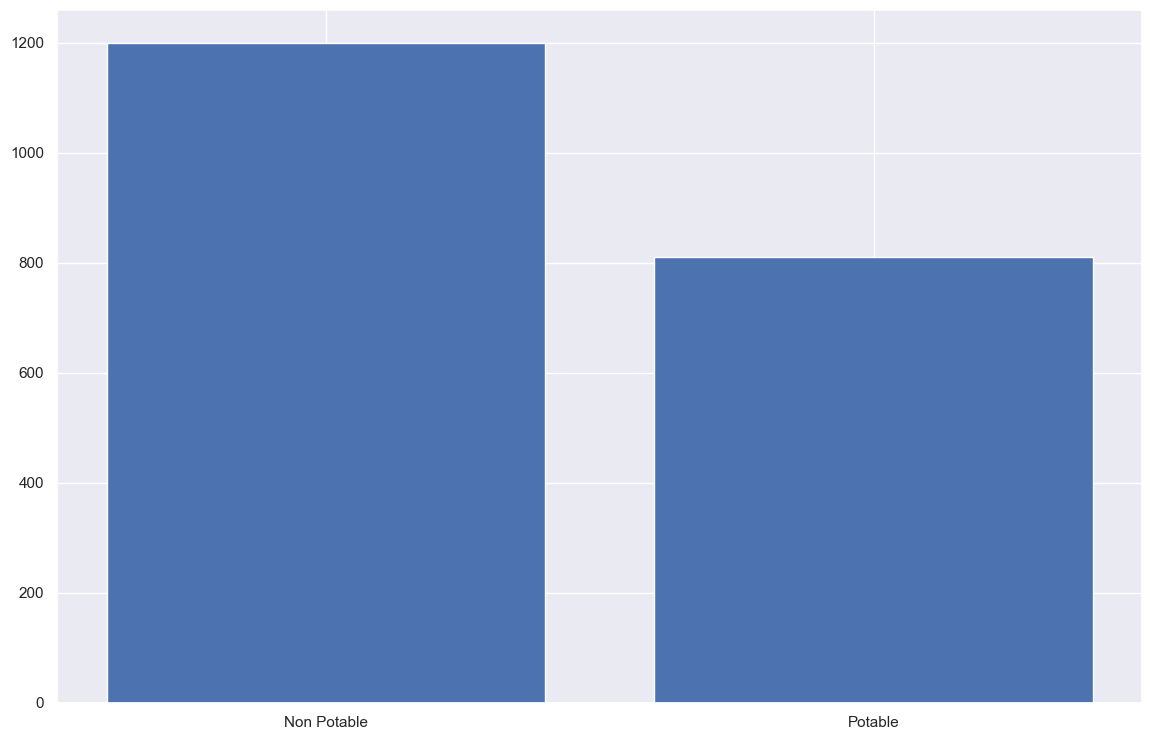

In [69]:
# 0 means Non-Potable, 1 means Potable
non_potable, potable = waterquality_df["Potability"].value_counts()
print("ratio of potable to non potable",(potable/non_potable))
labels=["Non Potable", "Potable"]
plt.bar(labels,[non_potable, potable])

In [70]:
X= waterquality_df.iloc[:,:-1]

In [71]:
Y =waterquality_df.iloc[:,-1:]

# Train Test Split

In [72]:
from sklearn.model_selection import train_test_split

X_train,x_test,Y_train,y_test= train_test_split(X,Y, test_size=0.2,random_state=12)

# Handling Imbalanced Dataset (Sampling)

**Is oversampling or unsersampling before train test split good idea ?**

Oversampling or undersampling should not be done before train_test split because it can lead to data leakage. If you oversample or undersample before splitting the data, you may end up with the same data in both the training and testing sets, which can lead to overfitting. Instead, it is recommended to split the data into training and testing sets first, and then oversample or undersample the training set only. This way, the model is trained on upsampled or downsampled data, but evaluated on a representative test set.

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
sm = SMOTE(random_state=12)

In [75]:
X_train_resampled,Y_train_resampled= sm.fit_resample(X_train,Y_train)

**Why shouldn't I upsample train set ?**

It is not preferred to upsample the test set in machine learning because the test set should be representative of the real-world data that the model will encounter. If the test set is upsampled, it will no longer be representative of the real-world data, and the model’s performance on the test set will not be a good indicator of its performance on real-world data. Instead, it is recommended to upsample the training set and use cross-validation to evaluate the model’s performance. This way, the model is trained on upsampled data, but evaluated on a representative test set.



# Feature Scaling

In [76]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

**What is Feature scaling?**

**What is Normalization and Standardization?**

**When should I use Normalization and Standardization?**

**What's difference between StandardScalar and MinMaxScaler?**

**Why should I use fit_transform() in Train set and transform() in Test set ?**


https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35


In [90]:
import joblib

In [91]:
X_train_scaled= scalar.fit_transform(X_train_resampled)
scaler_file_name= 'scaler.pkl'
joblib.dump(scalar,scaler_file_name)
x_test_scaled= scalar.transform(x_test)

In [89]:
X_train_resampled

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.025306  202.809081  23502.857795     5.239013  335.548719   
1     8.884935  145.277706  17621.390115     8.267974  341.477474   
2     8.416087  208.326022  28234.906857     7.784123  297.330528   
3     6.430255  207.579402  26855.105611     7.087910  304.173434   
4     7.356057  234.782302  31409.063979     7.395530  283.509583   
...        ...         ...           ...          ...         ...   
1895  7.606100  142.434050  21064.035580     6.721318  329.728608   
1896  5.609887  178.232032  22647.537186     6.634590  319.777771   
1897  5.144907  108.278207  19115.383762     9.231966  335.798270   
1898  6.553329  211.106920  15428.111006     7.334683  322.174478   
1899  5.658743  197.129006  21000.574871     9.565018  377.151333   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       471.131716       13.891519        63.751855   5.989543  
1       286.890777       15.194724        42.289054   4.714163  
2       444.560108       12.645176        78.756533   4.930084  
3       418.419471       17.921141        34.816398   4.805792  
4       428.753104       22.166321        87.399122   4.549917  
...            ...             ...              ...        ...  
1895    369.026375       10.225311        66.778519   3.331111  
1896    398.262953       18.552122        83.232966   4.030344  
1897    454.738671       17.317885        77.546235   3.727825  
1898    462.234196       18.644007        61.289835   4.085479  
1899    427.716624       14.772906        69.203122   3.958462  

[1900 rows x 9 columns]

In [95]:
print("Scaled train data:",X_train_scaled)
print("-------"*20)
print("Scaled test data:",x_test_scaled)

Scaled train data: [[-0.06250907  0.20209457  0.18041393 ... -0.14435158 -0.17932432
   2.66346583]
 [ 1.174437   -1.57035563 -0.49510773 ...  0.26405428 -1.56574158
   0.98571196]
 [ 0.8625794   0.37206274  0.723918   ... -0.53493808  0.78992219
   1.2697539 ]
 ...
 [-1.3132706  -2.71025139 -0.32351364 ...  0.92942316  0.71174147
  -0.31181027]
 [-0.3764484   0.45773779 -0.74701892 ...  1.34501106 -0.33836166
   0.15868198]
 [-0.9714888   0.02710049 -0.10698819 ...  0.13186242  0.17280732
  -0.00840925]]
--------------------------------------------------------------------------------------------------------------------------------------------
Scaled test data: [[-1.50424037  0.80565933 -0.71943481 ...  0.3693017   1.14340865
   0.00225837]
 [ 0.63191011 -0.16159791 -0.60615975 ... -0.64506376 -1.13164146
  -1.24113248]
 [ 0.78293159  0.06000526 -0.51261066 ...  1.15136711 -1.45124007
   1.88899242]
 ...
 [-0.35338159  1.5001804   0.22591029 ... -1.59874164 -1.23632081
   0.33097877]
 

In [28]:
#converting Y_train_resampled to 1D array.
Y_train_raveled = Y_train_resampled.values.ravel()
y_test_raveled= y_test.values.ravel()

In [27]:
# should be 2D array
print("shape of X_train_scaled",X_train_scaled.shape)
print("shape of x_test_scaled",x_test_scaled.shape)
# should be 1D array
print("shape of Y_train_raveled",Y_train_raveled.shape)
print("shape of y_test_raveled",y_test_raveled.shape)

shape of X_train_scaled (1900, 9)
shape of x_test_scaled (403, 9)
shape of Y_train_raveled (1900,)
shape of y_test_raveled (403,)


In [28]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [29]:
knn= KNeighborsClassifier()
svc = SVC()
RF= RandomForestClassifier()
AB=AdaBoostClassifier()
XGB=XGBClassifier()
GNB= GaussianNB()

# Parameters

In [30]:
parameter_knn={"n_neighbors": np.arange(1,10)}
parameter_svc = {'C': [0.1, 1,5, 10],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['linear', "poly","rbf"]}
parameter_rf={'n_estimators': [100,200, 350, 500],'criterion':["gini","entropy"],'max_depth':np.arange(1,10),'min_samples_leaf':[1,5,10]}
parameter_ab={'n_estimators': [100,200, 350, 500],'learning_rate': [0.2,0.5,0.8,1]}
parameter_xgb={'n_estimators': [50,100,150,200,300,400,500],'learning_rate': [0.2,0.5,0.8,1]}
parameter_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}

# KNN

In [31]:
#Knn
grid_knn= GridSearchCV(knn, parameter_knn,verbose=3)
grid_knn.fit(X_train_scaled,Y_train_raveled)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.682 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.650 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.653 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.700 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.732 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.674 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.674 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.618 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.658 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.684 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.668 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;,

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=3)

In [32]:
# print Best Parameters and Scores
print("Best Parameters",grid_knn.best_params_)

# Best estimator
best_estimator_knn=grid_knn.best_estimator_
print ("Best estimator:",best_estimator_knn)

Best Parameters {'n_neighbors': 1}
Best estimator: KNeighborsClassifier(n_neighbors=1)


# SVC

In [33]:
#svc
grid_svc= GridSearchCV(svc, parameter_svc, verbose=3)
grid_svc.fit(X_train_scaled,Y_train_raveled)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.529 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.497 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.532 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.516 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.518 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.563 total time=   4.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.553 total time=   3.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.558 total time=   8.8s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.579 total time=   3.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.526 total time=   3.7s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [47]:
# print Best Parameters and Scores
print ("Best Parameters",grid_svc.best_params_)

# Best estimator
best_estimator_svc=grid_svc.best_estimator_
print ("Best estimator:",best_estimator_svc)

Best Parameters {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Best estimator: SVC(C=5, gamma=0.1)


# RF

In [35]:
#rf
grid_rf=GridSearchCV(RF, parameter_rf,verbose=3)
grid_rf.fit(X_train_scaled,Y_train_raveled)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=100;, score=0.534 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=100;, score=0.497 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=100;, score=0.516 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=100;, score=0.547 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=100;, score=0.513 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=200;, score=0.534 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=200;, score=0.503 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=200;, score=0.524 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=1

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [100, 200, 350, 500]},
             verbose=3)

In [36]:
# print Best Parameters and Scores
print ("Best Parameters",grid_rf.best_params_)

# Best estimator
best_estimator_rf=grid_rf.best_estimator_
print ("Best estimator:",best_estimator_rf)

Best Parameters {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 500}
Best estimator: RandomForestClassifier(max_depth=9, n_estimators=500)


# AB

In [37]:
#AB
grid_ab= GridSearchCV(AB, parameter_ab, verbose=3)
grid_ab.fit(X_train_scaled,Y_train_raveled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END learning_rate=0.2, n_estimators=100;, score=0.516 total time=   0.4s
[CV 2/5] END learning_rate=0.2, n_estimators=100;, score=0.526 total time=   0.4s
[CV 3/5] END learning_rate=0.2, n_estimators=100;, score=0.537 total time=   0.5s
[CV 4/5] END learning_rate=0.2, n_estimators=100;, score=0.574 total time=   0.4s
[CV 5/5] END learning_rate=0.2, n_estimators=100;, score=0.524 total time=   0.4s
[CV 1/5] END learning_rate=0.2, n_estimators=200;, score=0.526 total time=   0.9s
[CV 2/5] END learning_rate=0.2, n_estimators=200;, score=0.532 total time=   0.9s
[CV 3/5] END learning_rate=0.2, n_estimators=200;, score=0.521 total time=   0.9s
[CV 4/5] END learning_rate=0.2, n_estimators=200;, score=0.597 total time=   0.9s
[CV 5/5] END learning_rate=0.2, n_estimators=200;, score=0.534 total time=   0.9s
[CV 1/5] END learning_rate=0.2, n_estimators=350;, score=0.513 total time=   1.5s
[CV 2/5] END learning_rate=0.2, n_est

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.5, 0.8, 1],
                         'n_estimators': [100, 200, 350, 500]},
             verbose=3)

In [38]:
# print Best Parameters and Scores
print ("Best Parameters",grid_ab.best_params_)

# Best estimator
best_estimator_ab=grid_ab.best_estimator_
print ("Best estimator:",best_estimator_ab)

Best Parameters {'learning_rate': 0.8, 'n_estimators': 100}
Best estimator: AdaBoostClassifier(learning_rate=0.8, n_estimators=100)


# XGB

In [39]:
#xgb
grid_xgb= GridSearchCV(XGB, parameter_xgb, verbose=3)
grid_xgb.fit(X_train_scaled,Y_train_raveled)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END learning_rate=0.2, n_estimators=50;, score=0.647 total time=   1.0s
[CV 2/5] END learning_rate=0.2, n_estimators=50;, score=0.629 total time=   0.3s
[CV 3/5] END learning_rate=0.2, n_estimators=50;, score=0.608 total time=   0.2s
[CV 4/5] END learning_rate=0.2, n_estimators=50;, score=0.658 total time=   0.2s
[CV 5/5] END learning_rate=0.2, n_estimators=50;, score=0.697 total time=   0.2s
[CV 1/5] END learning_rate=0.2, n_estimators=100;, score=0.634 total time=   0.4s
[CV 2/5] END learning_rate=0.2, n_estimators=100;, score=0.605 total time=   0.4s
[CV 3/5] END learning_rate=0.2, n_estimators=100;, score=0.600 total time=   0.4s
[CV 4/5] END learning_rate=0.2, n_estimators=100;, score=0.653 total time=   0.4s
[CV 5/5] END learning_rate=0.2, n_estimators=100;, score=0.718 total time=   0.4s
[CV 1/5] END learning_rate=0.2, n_estimators=150;, score=0.637 total time=   0.5s
[CV 2/5] END learning_rate=0.2, n_estimat

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...one,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.5, 0.8, 1],
                         'n_estimators': [50, 100, 150, 200, 300, 400, 500]},
             verbose=3)

In [40]:
#print Best Parameters and Scores
print ("Best Parameters",grid_xgb.best_params_)
# Best estimator
best_estimator_xgb=grid_xgb.best_estimator_
print ("Best estimator:",best_estimator_xgb)

Best Parameters {'learning_rate': 0.5, 'n_estimators': 200}
Best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


# Gaussian NB

In [41]:
#GNB
grid_gnb= GridSearchCV(GNB, parameter_gnb, verbose=3)
grid_gnb.fit(X_train_scaled,Y_train_raveled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.550 total time=   0.0s
[CV 2/5] END .................var_smoothing=1.0;, score=0.534 total time=   0.0s
[CV 3/5] END .................var_smoothing=1.0;, score=0.532 total time=   0.0s
[CV 4/5] END .................var_smoothing=1.0;, score=0.547 total time=   0.0s
[CV 5/5] END .................var_smoothing=1.0;, score=0.524 total time=   0.0s
[CV 1/5] END ..var_smoothing=0.8111308307896871;, score=0.547 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.8111308307896871;, score=0.542 total time=   0.0s
[CV 3/5] END ..var_smoothing=0.8111308307896871;, score=0.529 total time=   0.0s
[CV 4/5] END ..var_smoothing=0.8111308307896871;, score=0.545 total time=   0.0s
[CV 5/5] END ..var_smoothing=0.8111308307896871;, score=0.516 total time=   0.0s
[CV 1/5] END ...var_smoothing=0.657933224657568;, score=0.553 total time=   0.0s
[CV 2/5] END ...var_smoothing=0.65793322465756

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=3)

In [42]:
#print Best Parameters and Scores
print ("Best Parameters",grid_gnb.best_params_)

# Best estimator
best_estimator_gnb=grid_gnb.best_estimator_
print ("Best estimator:",best_estimator_gnb)



Best Parameters {'var_smoothing': 0.001}
Best estimator: GaussianNB(var_smoothing=0.001)


# Metrics

In [50]:
models_try= [best_estimator_gnb,best_estimator_ab,best_estimator_knn, best_estimator_xgb,best_estimator_rf,best_estimator_svc]
results = []
for models in models_try:
  models.fit(X_train_scaled,Y_train_raveled)
  y_test_pred=models.predict(x_test_scaled)
  report=classification_report(y_test_raveled, y_test_pred,output_dict=True)
  test_accuracy= report['accuracy']
  results.append({
        "Model": str(models),
        "Test Accuracy": report['accuracy'],
        "Precision": report['macro avg']['precision'],
        "Recall": report['macro avg']['recall'],
        "F1-score": report['macro avg']['f1-score'],
    })
df_results = pd.DataFrame(results)

In [51]:
df_results.head(6)

Model  Test Accuracy  \
0                    GaussianNB(var_smoothing=0.001)       0.568238   
1  AdaBoostClassifier(learning_rate=0.8, n_estima...       0.538462   
2                KNeighborsClassifier(n_neighbors=1)       0.550868   
3  XGBClassifier(base_score=None, booster=None, c...       0.632754   
4  RandomForestClassifier(max_depth=9, n_estimato...       0.622829   
5                                SVC(C=5, gamma=0.1)       0.617866   

   Precision    Recall  F1-score  
0   0.549071  0.550562  0.549113  
1   0.529956  0.531634  0.526900  
2   0.530616  0.531490  0.530469  
3   0.608783  0.607634  0.608141  
4   0.606180  0.609778  0.606950  
5   0.603835  0.608314  0.604156

In [53]:
import joblib

# Assuming 'model' is your trained scikit-learn model
# Save the model to a file
filename = 'xgb.pkl'
joblib.dump(best_estimator_xgb, filename)

# To load the model from the file later
loaded_model = joblib.load(filename)

# others